In [2]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import h5py
import matplotlib.pyplot as plt

from matplotlib import font_manager 
font_manager.findfont('Times New Roman') 
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 

#with h5py.File('/Users/gmurphy/Documents/results/MRI-258-064+0-SPE_beta_y=1600,iso,OA/usr790000.h5','r') as hf:
with h5py.File('/Users/gmurphy/Documents/results/MRI-258-064+0-SPE_beta_z=1600,iso,OA/usr790000.h5','r') as hf:
#with h5py.File('/Users/gmurphy/Documents/results/MRI-258-064+0-SPE_beta_z=1600,iso,OA,NVF=0.06/usr790000.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    dens = hf.get('density')
    den = np.array(dens)
    bh=hf.get('magnetic_field')   
    vh=hf.get('velocity')   
    b=bh.value
    v=vh.value
    de2=(np.squeeze(den[:,:,:] ))
    vx=(np.squeeze(v[:,:,:,0]))
    vy=(np.squeeze(v[:,:,:,1]))
    vz=(np.squeeze(v[:,:,:,2]))
    bx=(np.squeeze(b[:,:,:,0]))
    by=(np.squeeze(b[:,:,:,1]))
    bz=(np.squeeze(b[:,:,:,2]))

    
#print (den.shape)
#print (v.shape)

#print (de2.shape)
#print (vx.shape)

sl=64
de2d= np.log10(np.transpose((np.squeeze(de2[sl,:, :]))))
vx2d= np.transpose(np.squeeze(vx[sl,:,:]))
vy2d= np.transpose(np.squeeze(vy[sl,:,:]))
vz2d= np.transpose(np.squeeze(vz[sl,:,:]))
bx2d= np.transpose(np.squeeze(bx[sl,:,:]))
by2d= np.transpose(np.squeeze(by[sl,:,:]))
bz2d= np.transpose(np.squeeze(bz[sl,:,:]))

#print (de2d.shape)
#print (vx2d.shape)

    
#plt.imshow((de2d))








List of arrays in this file: 
 KeysViewWithLock(<HDF5 file "usr790000.h5" (mode r)>)


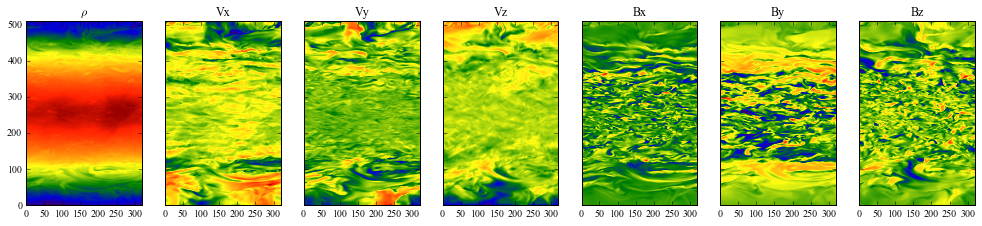

In [3]:
import matplotlib.pyplot as plt


arr=[de2d, vx2d, vy2d, vz2d, bx2d, by2d, bz2d]

tistr=[r'$\rho$', 'Vx', 'Vy', 'Vz', 'Bx', 'By', 'Bz']

arr=np.dstack((de2d,vx2d, vy2d, vz2d, bx2d, by2d, bz2d))
#print (arr.shape)

#f, ( ax1, ax2 ,ax3, ax4, ax5, ax6, ax7 ) = plt.subplots(1, 7,  sharey='row', figsize=(16,4))
#fig=plt.figure(figsize=(15, 6),facecolor='w', edgecolor='k')


fig, axes2d = plt.subplots(nrows=1, ncols=7,
                           sharex=True, sharey=True,
                           figsize=(17,3.3))

#for j in range(7):
    
for j, cell in enumerate(axes2d):
    #row = plt.subplot(1, 7, j + 1) 
    cell.set_ylim(1,511)
    cell.set_xlim(1,320)
    cell.imshow(arr[:,:,j])
    cell.set_title(tistr[j])
    #ax.set_xlim(xlim)
    #ax.set_ylim(ylim)
    
plt.savefig("test.pdf")


In [4]:
arr=np.dstack((de2d,vx2d))
print (arr.shape)

(513, 321, 2)


yt : [INFO     ] 2016-02-10 13:14:24,787 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-10 13:14:24,787 Parameters: domain_dimensions         = [129 321 513]
yt : [INFO     ] 2016-02-10 13:14:24,788 Parameters: domain_left_edge          = [-1.  0. -4.]
yt : [INFO     ] 2016-02-10 13:14:24,789 Parameters: domain_right_edge         = [ 1.  5.  4.]
yt : [INFO     ] 2016-02-10 13:14:24,790 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-10 13:14:25,780 xlim = 0.000000 5.000000
yt : [INFO     ] 2016-02-10 13:14:25,781 ylim = -4.000000 4.000000
yt : [INFO     ] 2016-02-10 13:14:25,784 xlim = 0.000000 5.000000
yt : [INFO     ] 2016-02-10 13:14:25,784 ylim = -4.000000 4.000000
yt : [INFO     ] 2016-02-10 13:14:25,785 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


(129, 321, 513)



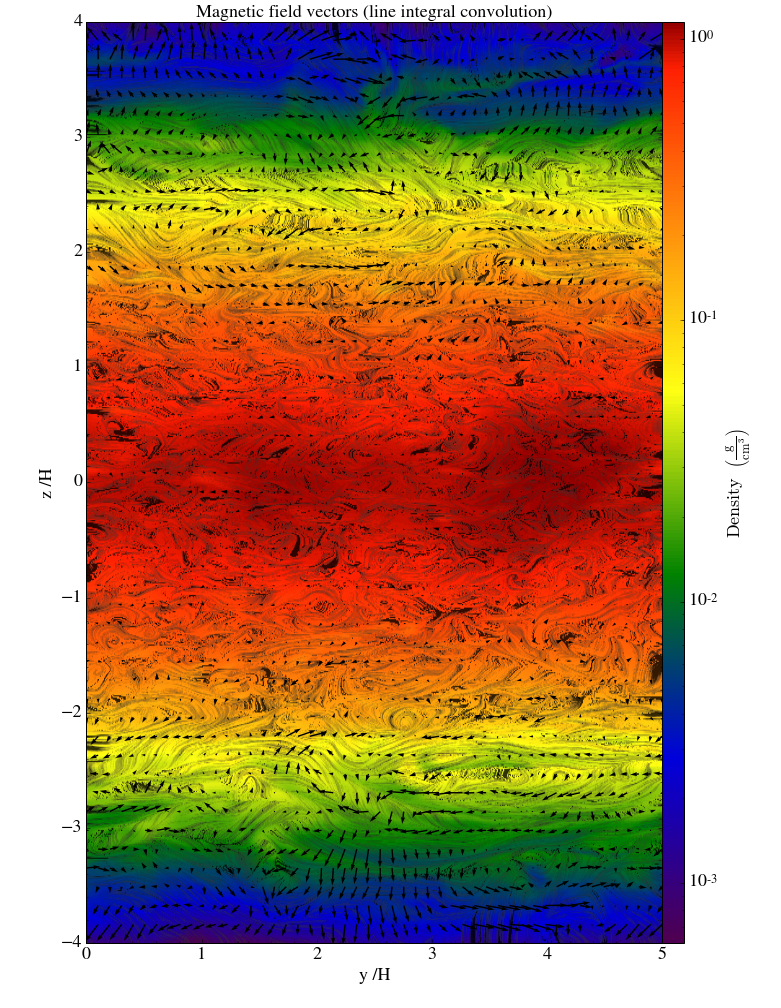

yt : [INFO     ] 2016-02-10 13:14:27,841 Saving plot licm_Slice_x_density.pdf
yt : [INFO     ] 2016-02-10 13:14:28,784 Saving plot licm_Slice_x_density.png
yt : [INFO     ] 2016-02-10 13:14:29,244 xlim = 0.000000 5.000000
yt : [INFO     ] 2016-02-10 13:14:29,244 ylim = -4.000000 4.000000
yt : [INFO     ] 2016-02-10 13:14:29,247 xlim = 0.000000 5.000000
yt : [INFO     ] 2016-02-10 13:14:29,248 ylim = -4.000000 4.000000
yt : [INFO     ] 2016-02-10 13:14:29,249 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



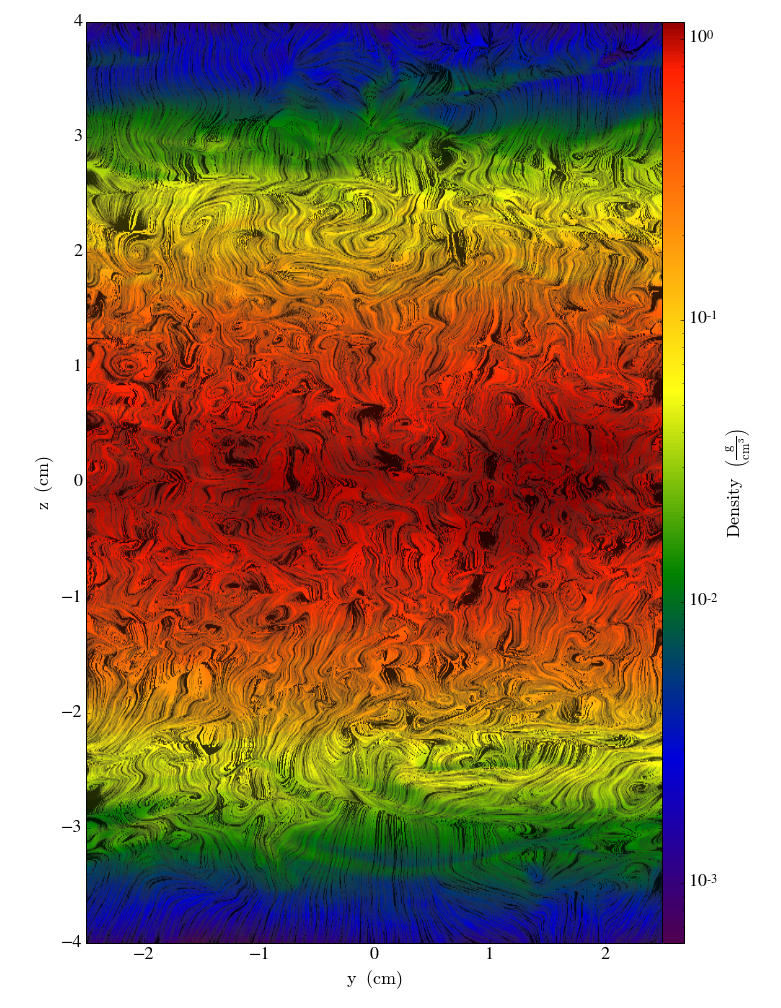

yt : [INFO     ] 2016-02-10 13:14:32,820 Saving plot licv_Slice_x_density.pdf
yt : [INFO     ] 2016-02-10 13:14:33,381 Saving plot licv_Slice_x_density.png


['licv_Slice_x_density.png']

In [39]:
import yt
ds = dict(density = (den, "g/cm**3")  , velocity_x = (vx, "cm/s"), velocity_y = (vy, "cm/s") , 
          velocity_z = (vz, "cm/s"),
          b_x = (bx, "G"),
          b_y = (by, "G"),
          b_z = (bz, "G")
         )
bbox = np.array([[-1., 1.], [0., 5.], [-4, 4]])
ds = yt.load_uniform_grid(ds, den.shape, length_unit="code_length", bbox=bbox, nprocs=4)
dir(ds)
print (vy.shape)
s = yt.SlicePlot(ds, 'x', 'density', center=[0,2.5,0], origin="native")

#s.set_width(5,4)


#s.annotate_line_integral_convolution('velocity_y', 'velocity_z', lim=(0.5,0.65))
s.annotate_line_integral_convolution('b_y', 'b_z', lim=(0.5,0.65))
#s.annotate_streamlines('velocity_y', 'velocity_z')
s.annotate_quiver('velocity_y', 'velocity_z', 16)
#s.set_axes_unit('H')
s.set_xlabel('y /H')
s.set_ylabel('z /H')
#
#s.hide_axes()
#s.set_figure_size(15)
s.annotate_title('Magnetic field vectors (line integral convolution)')
s.show()
s.save( 'licm', suffix="pdf")
s.save( 'licm', suffix="png")




s = yt.SlicePlot(ds, 'x', 'density', center='c')
s.annotate_line_integral_convolution('velocity_y', 'velocity_z', lim=(0.5,0.65))
s.show()
s.set_xlabel('y /H')
s.set_ylabel('z /H')
s.annotate_title('Velocity field vectors (line integral convolution)')
s.save( 'licv', suffix="pdf")
s.save( 'licv', suffix="png")
#s.annotate_line_integral_convolution('velocity_y', 'velocity_z', lim=(0.5,0.65))




yt : [INFO     ] 2016-02-10 11:48:24,525 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-10 11:48:24,525 Parameters: domain_dimensions         = [129 321 513]
yt : [INFO     ] 2016-02-10 11:48:24,526 Parameters: domain_left_edge          = [-1.  0. -4.]
yt : [INFO     ] 2016-02-10 11:48:24,527 Parameters: domain_right_edge         = [ 1.  5.  4.]
yt : [INFO     ] 2016-02-10 11:48:24,527 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-10 11:48:25,476 xlim = -6.000000 2.000000
yt : [INFO     ] 2016-02-10 11:48:25,477 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-02-10 11:48:25,480 xlim = -6.000000 2.000000
yt : [INFO     ] 2016-02-10 11:48:25,480 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-02-10 11:48:25,481 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2016-02-10 11:48:25,703 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


(129, 321, 513)



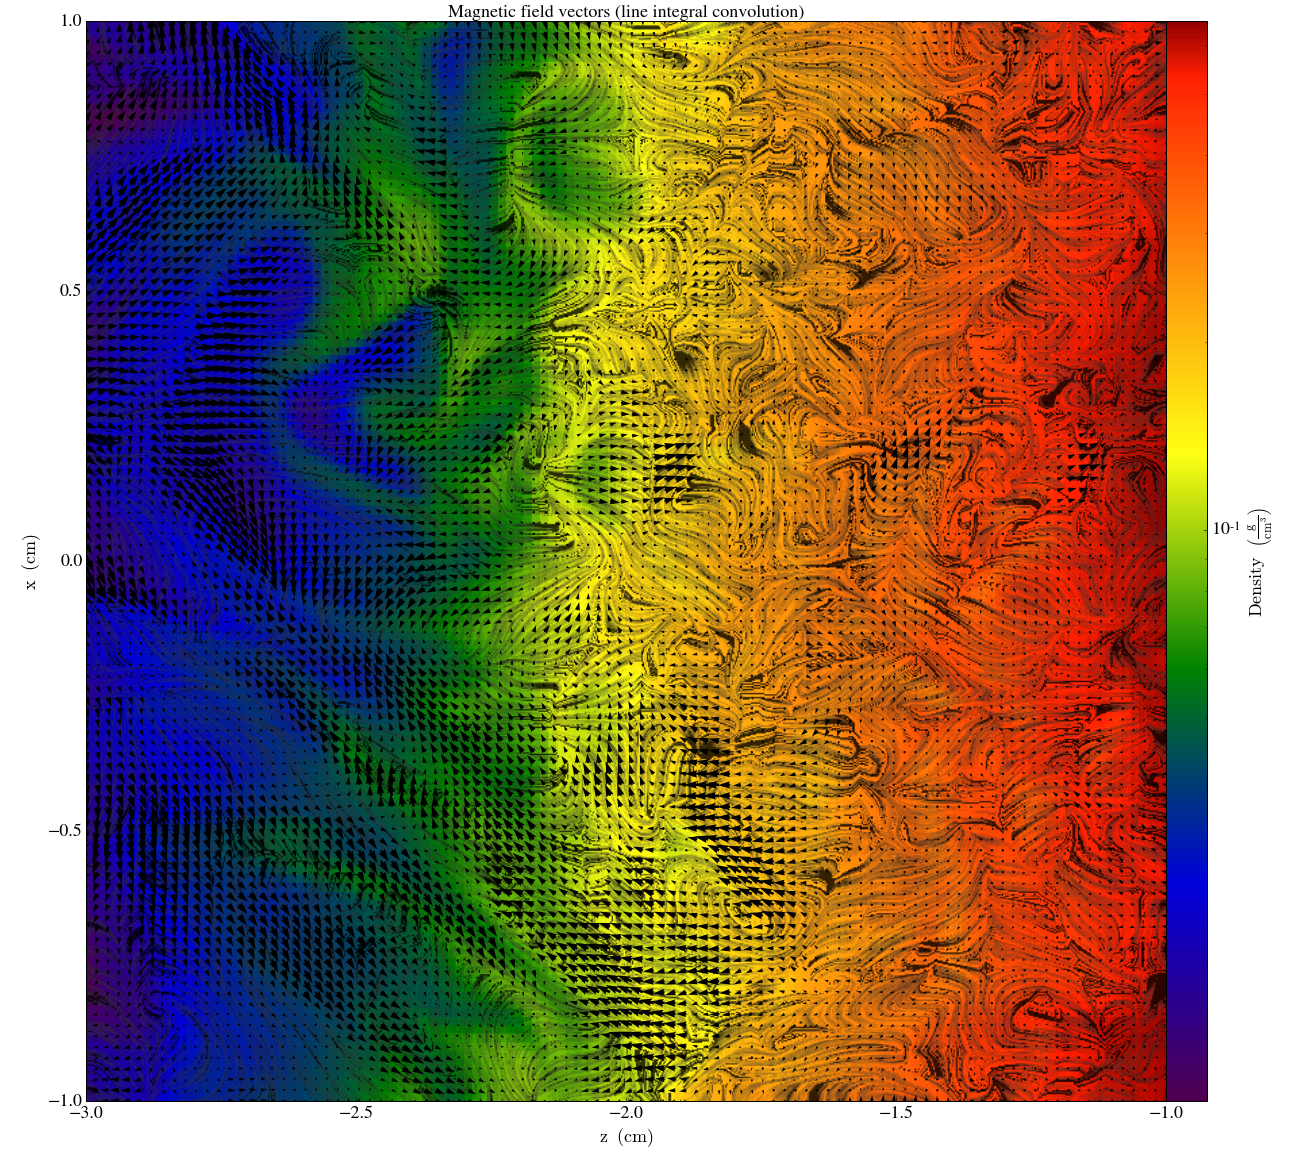

yt : [INFO     ] 2016-02-10 11:48:29,031 Saving plot licm_Slice_y_density.pdf
yt : [INFO     ] 2016-02-10 11:48:31,605 Saving plot licm_Slice_y_density.png


['licm_Slice_y_density.png']

In [34]:
import yt
ds = dict(density = (den, "g/cm**3")  , velocity_x = (vx, "cm/s"), velocity_y = (vy, "cm/s") , 
          velocity_z = (vz, "cm/s"),
          b_x = (bx, "G"),
          b_y = (by, "G"),
          b_z = (bz, "G")
         )
bbox = np.array([[-1., 1.], [0., 5.], [-4, 4]])
ds = yt.load_uniform_grid(ds, den.shape, length_unit="code_length", bbox=bbox, nprocs=4)
dir(ds)
print (vy.shape)
s = yt.SlicePlot(ds, 'y', 'density', center=[0,2.5,-2], origin="native")
#s.zoom(2)
#s.annotate_line_integral_convolution('velocity_y', 'velocity_z', lim=(0.5,0.65))
s.annotate_line_integral_convolution('b_x', 'b_z', lim=(0.5,0.65))
#s.annotate_streamlines('velocity_x', 'velocity_z')
s.annotate_quiver('velocity_x', 'velocity_z', 8)

#s.zoom(2)
s.set_width(2,2)

#s.set_axes_unit('H')

#s.set_xlabel(' /H')
#s.set_ylabel('z /H')
#
#s.hide_axes()
s.set_figure_size(15)
s.annotate_title('Magnetic field vectors (line integral convolution)')
s.show()
s.save( 'licm', suffix="pdf")
s.save( 'licm', suffix="png")



yt : [INFO     ] 2016-02-10 10:35:23,571 AMRKDTree rebuilt, Final Volume: 8.000000e+01
Streamlining: 100%|██████████| 100/100 [00:01<00:00, 67.92it/s]


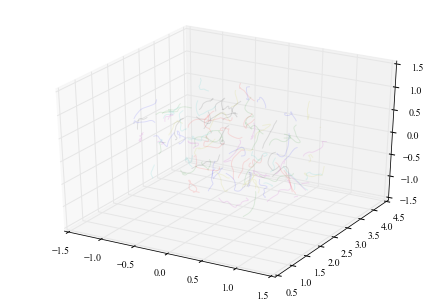

In [27]:
from yt.visualization.api import Streamlines
from yt.units import Mpc
from mpl_toolkits.mplot3d import Axes3D

c = ds.domain_center
N = 100
scale = ds.domain_width[0]
pos_dx = np.random.random((N,3))*scale-scale/2.
pos = c+pos_dx

# Create streamlines of the 3D vector velocity and integrate them through
# the box defined above
streamlines = Streamlines(ds, pos, 'b_x', 'b_y', 'b_z',
                          length=1.0, get_magnitude=True)
streamlines.integrate_through_volume()

# Create a 3D plot, trace the streamlines throught the 3D volume of the plot
fig=plt.figure()
ax = Axes3D(fig)

for stream in streamlines.streamlines:
    stream = stream[np.all(stream != 0.0, axis=1)]
    ax.plot3D(stream[:,0], stream[:,1], stream[:,2], alpha=0.1)
    
    
plt.savefig('streamlines_isocontour.png')





yt : [INFO     ] 2016-02-10 14:00:15,774 Setting default field to ('gas', 'density')
yt : [INFO     ] 2016-02-10 14:00:15,775 Creating default volume
yt : [INFO     ] 2016-02-10 14:00:16,636 Creating default transfer function
yt : [INFO     ] 2016-02-10 14:00:16,636 Calculating data bounds. This may take a while.  Set the .bounds to avoid this.
yt : [INFO     ] 2016-02-10 14:00:17,551 Rendering scene (Can take a while).


<Camera Object>:
	position:[  1.  15.   4.] code_length
	focus:[ 0.   2.5  0. ] code_length
	north_vector:[-0.19611614  0.         -0.98058068] dimensionless
	width:[ 2.  5.  8.] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[       0.   8000006.5        0. ] code_length
Before render


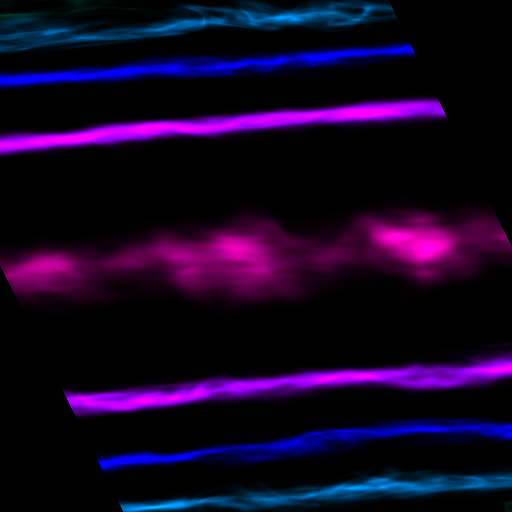

In [61]:
%matplotlib inline

import yt
import numpy as np
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, Camera, VolumeSource




#im, sc = volume_render(ds, field=('gas', 'density'))


cam = Camera(ds, lens_type='perspective')

#print (cam)

sc = yt.create_scene(ds)


#
tfh = TransferFunctionHelper(ds)
tfh.set_field('density')
tfh.set_log(True)
tfh.set_bounds()
tfh.build_transfer_function()
tfh.tf.add_layers(10, colormap='gist_rainbow')

# Grab the first render source and set it to use the new transfer function
render_source = sc.get_source(0)
render_source.transfer_function = tfh.tf




# Standing at (x=0.05, y=0.5, z=0.5), we look at the area of x>0.05 (with some open angle
# specified by camera width) along the positive x direction.
sc.camera.position = ds.arr([1, 15., 4.], 'code_length')

normal_vector = [0., 2.5, 0.]
north_vector = [-0.1, 0.8, -0.5]
sc.camera.switch_orientation(normal_vector=normal_vector,
                       north_vector=north_vector)

# The width determines the opening angle
sc.camera.set_width(ds.domain_width )

#sc.camera = cam
print (sc.camera)
#sc.camera.zoom(0.3)
print ('Before render')
sc.render()
sc.show(sigma_clip=4.0)